# We provode one visualization sample (A2) on HER2+ dataset.

The corresponding data can be found in ./data/HER2/
preds.npy and gts.npy were produced by src/train_test/evaluation.py

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import anndata as ad

# Construct adata_prediction, adata_ground_truth

In [2]:
preds_list=np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/A2/preds.npy')
ct_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/A2/center.npy')
gt_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/A2/gts.npy')
adata = ad.AnnData(preds_list)
adata.obsm['spatial'] = ct_list
adata_gt = ad.AnnData(gt_list)
adata_gt.obsm['spatial'] = ct_list

In [3]:
predicted_gene_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/data/her_hvg_cut_1000.npy'
gene_list = list(np.load(predicted_gene_path,allow_pickle=True))
adata.var_names = gene_list
adata_gt.var_names = gene_list
img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/HER2-images/HE/A2.jpg'
import cv2
img = cv2.imread(img_path)

# Spatial visualization of gene C3

/tmp/ipykernel_2172408/3289298610.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_gt,color='C3',img=img,spot_size=150,show=False,ax=ax,cmap='viridis',alpha_img=0.8)


[<Axes: title={'center': 'C3'}, xlabel='spatial1', ylabel='spatial2'>]

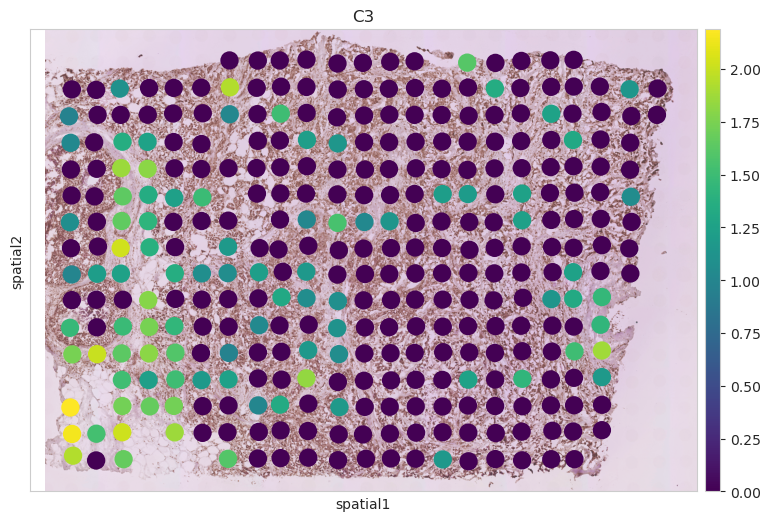

In [10]:
#ground truth
fig,ax=plt.subplots(figsize=(10,6))
sc.pl.spatial(adata_gt,color='C3',img=img,spot_size=150,show=False,ax=ax,cmap='viridis',alpha_img=0.8)

/tmp/ipykernel_2172408/1658037314.py:2: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata,color='C3',img=img,spot_size=150,show=False,ax=ax,cmap='viridis',alpha_img=0.8)


[<Axes: title={'center': 'C3'}, xlabel='spatial1', ylabel='spatial2'>]

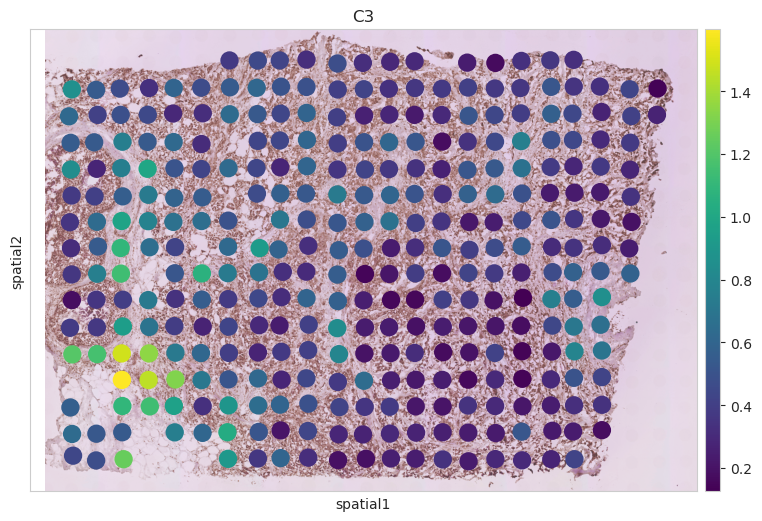

In [11]:
fig,ax=plt.subplots(figsize=(10,6))
sc.pl.spatial(adata,color='C3',img=img,spot_size=150,show=False,ax=ax,cmap='viridis',alpha_img=0.8)

# Spatial visualization of leukocyte mediated immunity gene set on A2

In [12]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, '#FFFFFF'),  
          (0.3, '#FFFFFF'),  
          (1, '#FF0000')] 
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

/tmp/ipykernel_2172408/2511753932.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_gt,img=img,color=['leukocyte mediated immunity'],cmap='coolwarm',spot_size=120,alpha_img=0.7)


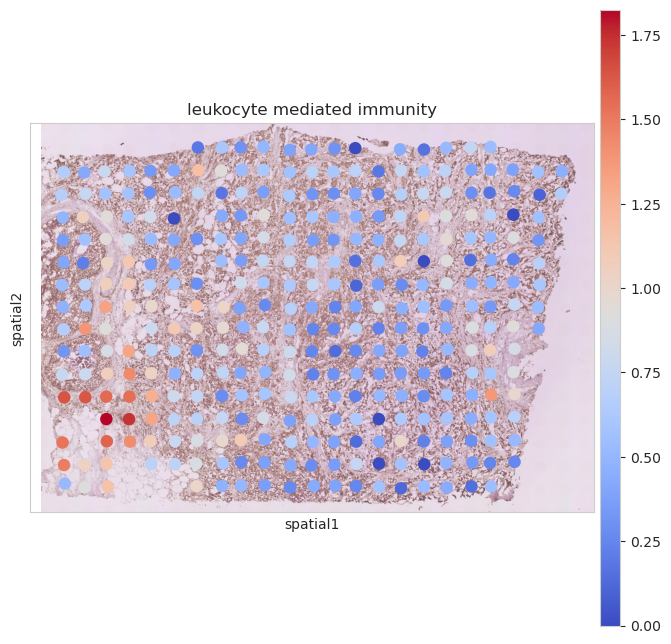

In [13]:
plt.rcParams["figure.figsize"] = (8, 8)
genes=['C1QB','IGKC','PTGDS','C3','IGHA1','IGHG3','C1R','HLA-DRA','CD74','HLA-B','IGLC3']  #leukocyte mediated immunity通路
gene_exp=np.mean(adata_gt.to_df()[genes].values,axis=1)
adata_gt.obs['leukocyte mediated immunity']=gene_exp.reshape(adata_gt.shape[0],)
sc.pl.spatial(adata_gt,img=img,color=['leukocyte mediated immunity'],cmap='coolwarm',spot_size=120,alpha_img=0.7)

/tmp/ipykernel_2172408/2937198760.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata,img=img,color=['leukocyte mediated immunity'],cmap='coolwarm',spot_size=120,alpha_img=0.7)


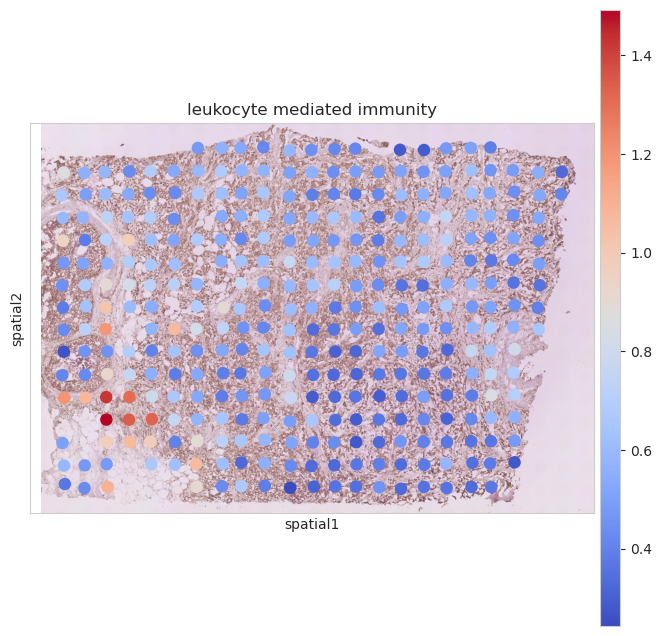

In [14]:
plt.rcParams["figure.figsize"] = (8, 8)
genes=['C1QB','IGKC','PTGDS','C3','IGHA1','IGHG3','C1R','HLA-DRA','CD74','HLA-B','IGLC3']
gene_exp=np.mean(adata.to_df()[genes].values,axis=1)
adata.obs['leukocyte mediated immunity']=gene_exp.reshape(adata.shape[0],)
sc.pl.spatial(adata,img=img,color=['leukocyte mediated immunity'],cmap='coolwarm',spot_size=120,alpha_img=0.7)